In [1]:
import xarray as xr
import src.Teleconnection.tools as tools
import src.composite.field_composite as composite

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt
import cartopy.crs as ccrs

In [3]:
import src.plots.utils as utils
import matplotlib as mpl
import src.plots.composite_spatial_pattern as composite_plots

# Read data

## variable

In [4]:
var = "tsurf"

In [5]:
dataname = (
    "/work/mh0033/m300883/3rdPanel/data/influence/"
    + var
    + "/"
    + "onepct_1850-1999_ens_1-100."
    + var
    + ".ano.nc"
)


In [6]:
tsurf = xr.open_dataset(dataname)

In [7]:
tsurf

<xarray.Dataset>
Dimensions:    (time: 149, bnds: 2, lon: 192, lat: 96, ens: 100)
Coordinates:
  * time       (time) datetime64[ns] 1851-03-16T11:52:00 ... 1999-03-16T11:52:00
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat        (lat) float32 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
Dimensions without coordinates: bnds, ens
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tsurf      (time, ens, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 2.0.5 (https://...
    Conventions:               CF-1.6
    source:                    ECHAM6
    institution:               Max-Planck-Institute for Meteorology
    history:                   Tue Aug 30 11:10:05 2022: cdo -P 48 -f nc -r -...
    NCO:                       4.6.7
    nco_openmp_thread_number:  1
    frequency:                 year
    cdo_openmp_thread_number:  48
    CDO:                       Climate Data Operators version 2.0.5 (https://...

demean

In [8]:
tsurf = tsurf-tsurf.mean(dim = 'ens')
tsurf = tsurf[var]

In [9]:
tsurf

<xarray.DataArray 'tsurf' (time: 149, ens: 100, lat: 96, lon: 192)>
array([[[[ 4.93526459e-03, -5.74827194e-02, -4.95433807e-02, ...,
           5.01585007e-02,  2.79846191e-02,  4.07705307e-02],
         [-5.09518623e-01, -4.58056450e-01, -3.60642433e-01, ...,
          -6.07553482e-01, -5.67199707e-01, -5.17569542e-01],
         [-1.49249077e-01, -1.25000954e-01, -1.52551651e-01, ...,
          -2.66260147e-01, -2.41464615e-01, -1.50797844e-01],
         ...,
         [ 7.40660071e-01,  5.59347868e-01,  8.52277517e-01, ...,
           7.60167956e-01,  7.47406721e-01,  7.47648597e-01],
         [ 6.96188211e-01,  7.91721940e-01,  8.84657860e-01, ...,
           4.49087262e-01,  7.10003376e-01,  6.66706085e-01],
         [ 1.14866972e-01,  2.90048122e-02,  8.91220570e-02, ...,
           5.55038452e-04,  3.88128757e-02,  2.88918018e-02]],

        [[-1.54769230e+00, -1.57384586e+00, -1.57241535e+00, ...,
          -1.53885078e+00, -1.56154156e+00, -1.56858826e+00],
         [-2.60590172e+00, -2.54677773e+00, -2.50888443e+00, ...,
          -2.77372456e+00, -2.74284840e+00, -2.67219257e+00],
         [-3.46194363e+00, -3.30920506e+00, -3.21619320e+00, ...,
          -3.66763783e+00, -3.68533897e+00, -3.55474186e+00],
...
          -8.85375142e-01, -9.14128423e-01, -8.44578385e-01],
         [-1.04380345e+00, -1.00904787e+00, -1.13138711e+00, ...,
          -9.94466424e-01, -9.98795629e-01, -8.93035173e-01],
         [ 6.55360222e-02,  1.60453320e-02,  1.17840767e-02, ...,
          -1.21698380e-02,  1.06756687e-02,  2.95693874e-02]],

        [[ 1.85071945e-01,  1.74805641e-01,  1.95933342e-01, ...,
           1.85382843e-01,  1.69438362e-01,  1.82622910e-01],
         [ 1.67309284e+00,  1.73657513e+00,  1.73229885e+00, ...,
           1.42425060e+00,  1.50365734e+00,  1.55554581e+00],
         [ 1.33034229e+00,  1.32693195e+00,  1.32333279e+00, ...,
           1.01329041e+00,  1.16060734e+00,  1.27270889e+00],
         ...,
         [ 8.28271866e-01,  8.87888670e-01,  1.00117779e+00, ...,
           7.40810156e-01,  6.78188562e-01,  7.15259790e-01],
         [ 2.62705088e-01,  2.43717194e-01,  4.79927063e-01, ...,
           1.62415028e-01, -1.78394318e-02,  1.15983486e-02],
         [-9.74002600e-01, -1.03068948e+00, -9.97291088e-01, ...,
          -8.79525423e-01, -8.64771128e-01, -9.29887772e-01]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1851-03-16T11:52:00 ... 1999-03-16T11:52:00
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float32 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
Dimensions without coordinates: ens

## index

In [10]:
first_index = xr.open_dataset("/work/mh0033/m300883/3rdPanel/data/allPattern/dep/all_pattern/first10_all_whole.nc").pc
last_index = xr.open_dataset("/work/mh0033/m300883/3rdPanel/data/allPattern/dep/all_pattern/last10_all_whole.nc").pc

In [11]:
first_index["time"] = first_index.indexes["time"].to_datetimeindex()
last_index["time"] = last_index.indexes["time"].to_datetimeindex()

first_index = first_index.sel(hlayers = 50000)
last_index = last_index.sel(hlayers = 50000)



/tmp/ipykernel_2849610/3262858303.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  first_index["time"] = first_index.indexes["time"].to_datetimeindex()
/tmp/ipykernel_2849610/3262858303.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  last_index["time"] = last_index.indexes["time"].to_datetimeindex()


In [18]:
first_index['time'] = first_index.time.dt.year

In [17]:
last_index['time'] = last_index.time.dt.year

In [20]:
last_index

<xarray.DataArray 'pc' (mode: 2, ens: 100, time: 10)>
array([[[-0.211276,  0.381581, ...,  1.476834,  0.779571],
        [ 1.01875 , -1.040697, ...,  0.071422, -0.386343],
        ...,
        [-1.144329, -0.248148, ..., -1.957648, -1.568521],
        [ 1.632869,  0.292192, ...,  0.636452,  1.096232]],

       [[ 1.38918 , -0.18831 , ..., -0.351362, -0.128976],
        [-0.911318, -0.270086, ...,  0.814347, -1.527255],
        ...,
        [ 0.14468 , -0.432208, ...,  0.985069, -0.5572  ],
        [ 0.045558,  0.1192  , ...,  0.06627 , -1.4435  ]]])
Coordinates:
    hlayers  float64 5e+04
  * mode     (mode) object 'NAO' 'EA'
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * time     (time) int64 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999

In [19]:
first_tsurf = composite.Tel_field_composite(first_index,tsurf)
last_tsurf = composite.Tel_field_composite(last_index,tsurf)

TypeError: Cannot compare dtypes datetime64[ns] and int64

In [16]:
last_tsurf

<xarray.DataArray 'tsurf' (mode: 2, extr_type: 2, lat: 96, lon: 192)>
array([[[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[-0.52676964, -0.5303166 , -0.52066946, ..., -0.54500675,
          -0.53512   , -0.523031  ],
         [ 0.3099556 ,  0.37943935,  0.42380047, ...,  0.1237886 ,
           0.1959467 ,  0.24229932],
         [-0.3095863 , -0.19792056, -0.05240488, ..., -0.5411258 ,
          -0.47042632, -0.38200212],
...
         [-1.1672366 , -1.2513298 , -1.1781197 , ..., -1.1885535 ,
          -1.2039745 , -1.1582506 ],
         [-0.77352256, -0.7948621 , -0.80164987, ..., -0.6660032 ,
          -0.7615625 , -0.80567694],
         [-0.03039213, -0.03908694, -0.01204995, ..., -0.01438487,
          -0.01388113, -0.003467  ]],

        [[-0.05714035, -0.05324402, -0.05593548, ..., -0.04264603,
          -0.04722595, -0.05319843],
         [-0.49249476, -0.47683126, -0.45720863, ..., -0.47768116,
          -0.4881138 , -0.49564075],
         [-0.17023163, -0.1467638 , -0.12415981, ..., -0.18097381,
          -0.1876419 , -0.17893848],
         ...,
         [-0.3003056 , -0.2906713 , -0.2474345 , ..., -0.42888555,
          -0.4125951 , -0.4039238 ],
         [-0.12871924, -0.13993958, -0.11953263, ..., -0.11864813,
          -0.08487401, -0.07847953],
         [ 0.11578536,  0.10380554,  0.10948773, ...,  0.13045797,
           0.13642415,  0.14359102]]]], dtype=float32)
Coordinates:
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat        (lat) float32 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
    hlayers    float64 5e+04
  * mode       (mode) object 'NAO' 'EA'
  * extr_type  (extr_type) <U3 'pos' 'neg'

In [15]:
last_tsurf.plot(x = 'lon',y = 'lat',col = 'mode')

ValueError: Only 1d and 2d plots are supported for facets in xarray. See the package `Seaborn` for more options.

In [29]:
import src.plots.composite_spatial_pattern as composite_plots
import src.plots.utils as utils

In [30]:
levels = np.arange(-3.0,3.1,0.5)
unit = 'K',
first = first_tsurf
last = last_tsurf
mode = 'NAO'
var = 'tsurf'

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use

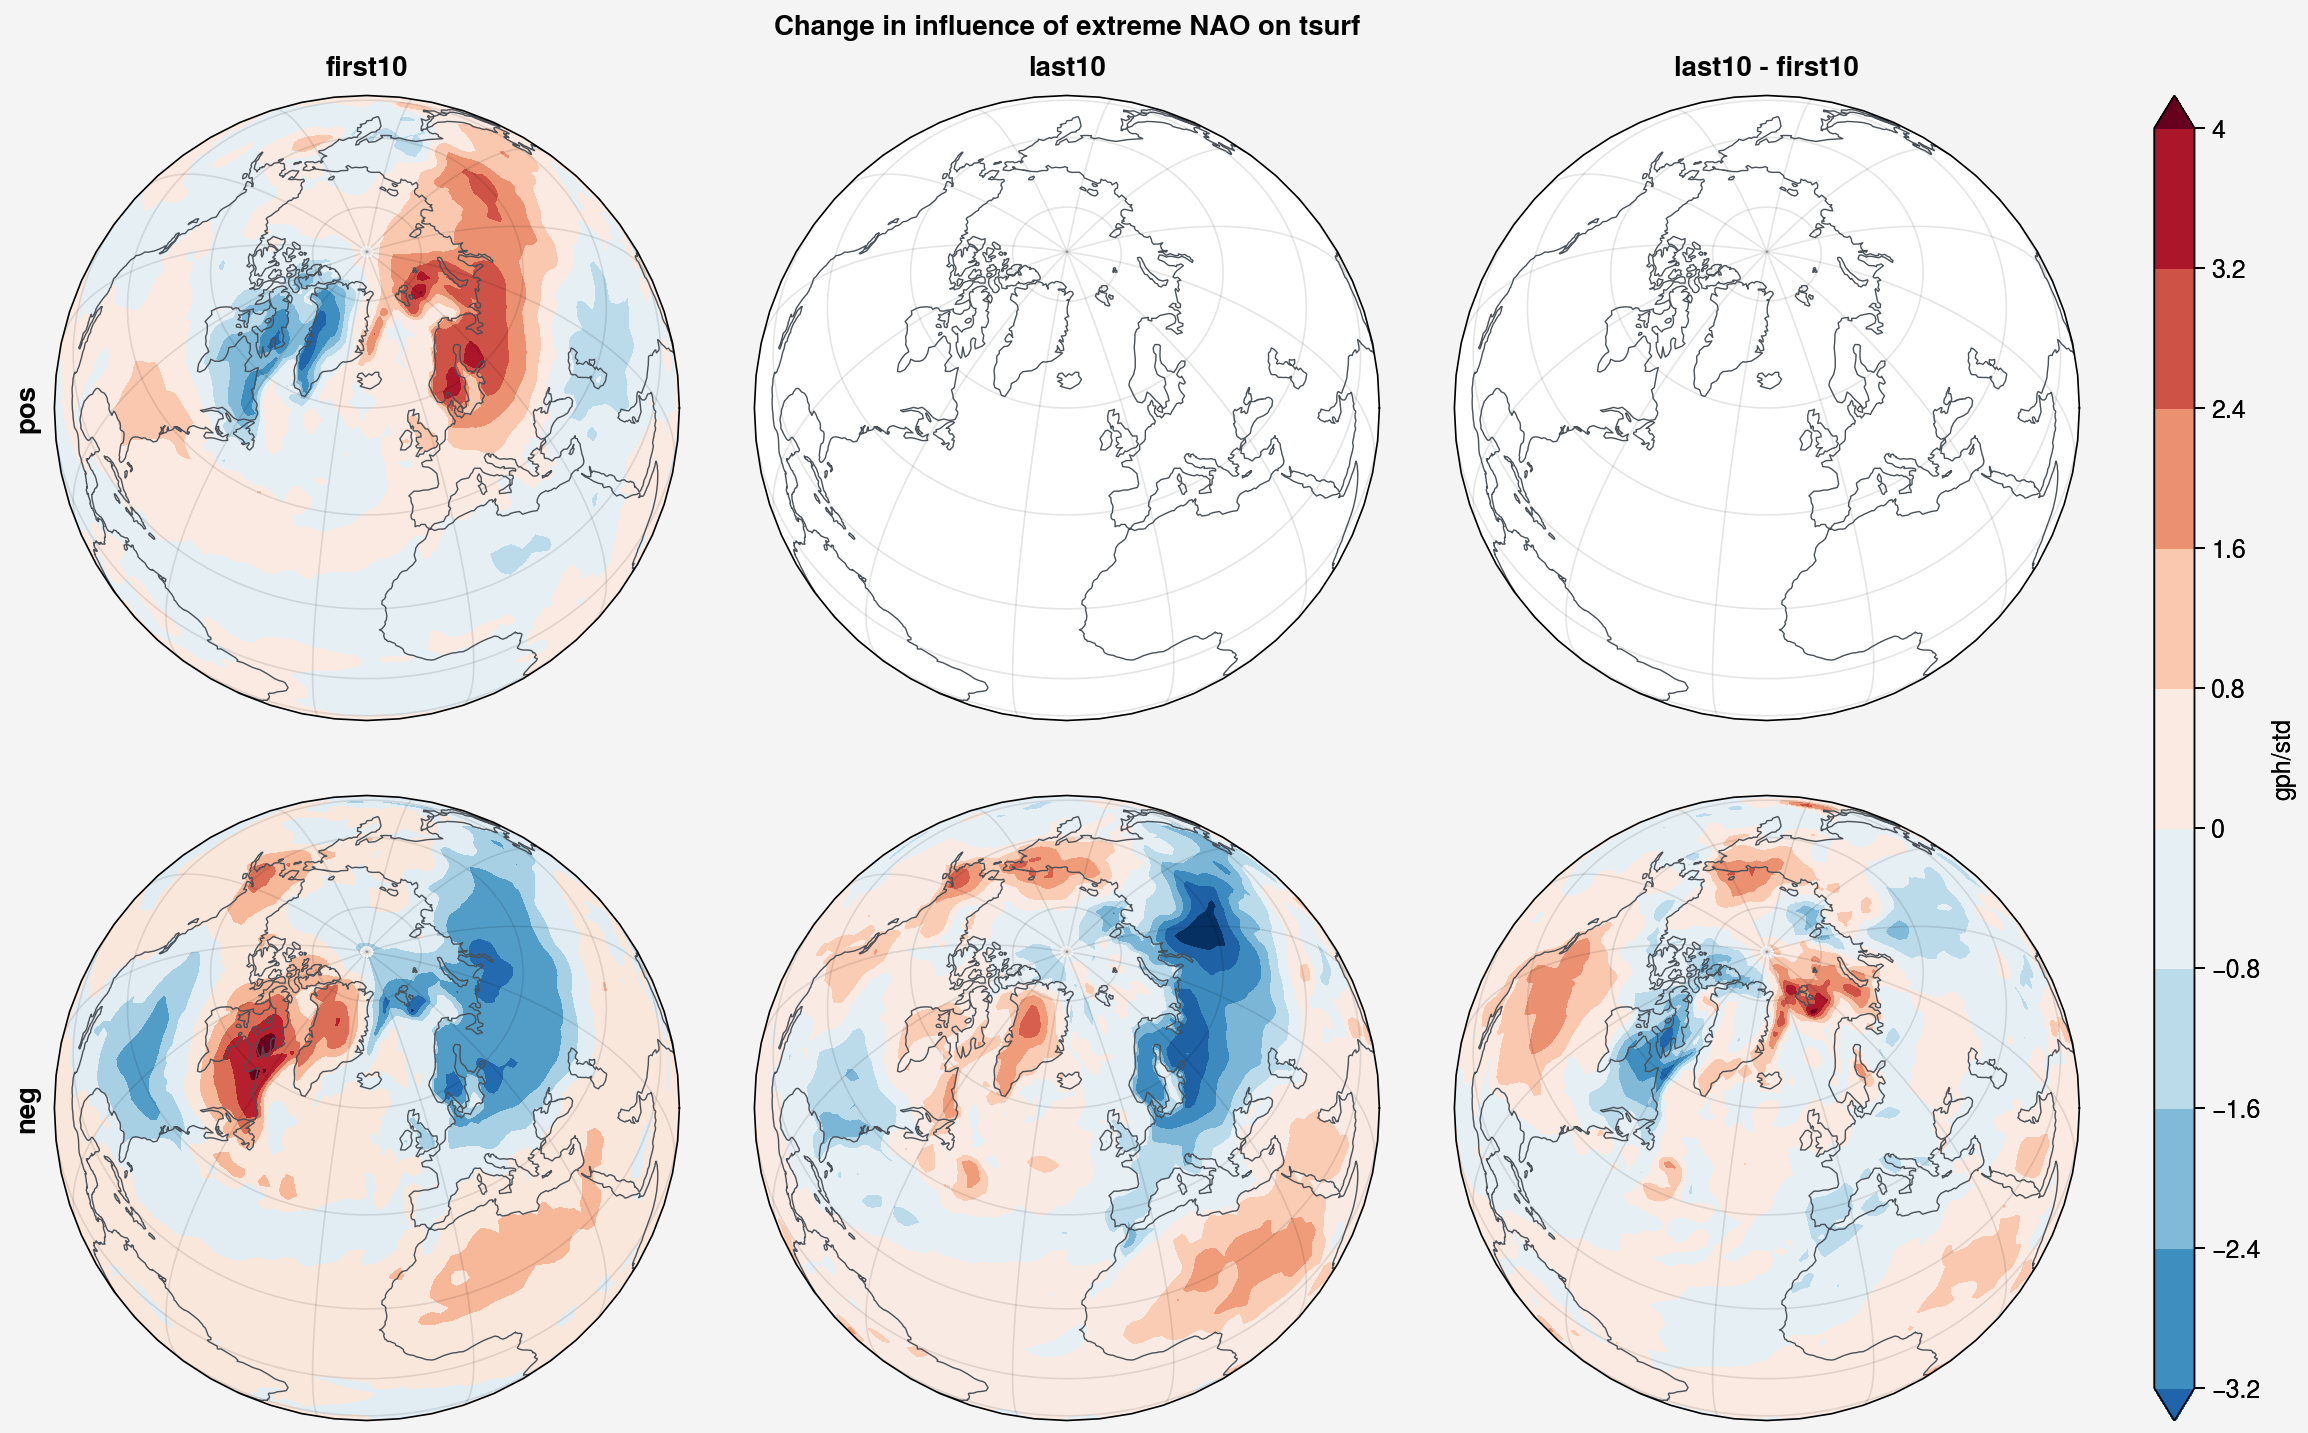

In [31]:
first = utils.erase_white_line(first)
last = utils.erase_white_line(last)

data_all = [
    first.sel(mode=mode),
    last.sel(mode=mode),
    last.sel(mode=mode) - first.sel(mode=mode),
]
extr_type = ["pos", "neg"]

fig, axes = pplt.subplots(
    space=0,
    refwidth="25em",
    wspace=3,
    hspace=3,
    proj="ortho",
    proj_kw=({"lon_0": -20, "lat_0": 60}),
    nrows=2,
    ncols=3,
)
axes.format(
    latlines=20,
    lonlines=30,
    coast=True,
    coastlinewidth=0.5,
    coastcolor="gray7",
    toplabels=  ["first10", "last10", "last10 - first10"],
    leftlabels=("pos", "neg"),
    suptitle = f"Change in influence of extreme {mode} on {var}",
)

extr_types = ["pos", "neg"]
for i, extr_type in enumerate(extr_types):
    for j, data in enumerate(data_all):  # one row

        first_m = axes[i, j].contourf(
            data.sel(extr_type = extr_type),
            x="lon",
            y="lat",
            # levels=levels,
            extend="both",
            transform=ccrs.PlateCarree(),
            cmap="RdBu_r",
        )


fig.colorbar(first_m, loc="r", pad=3, title="gph/std")

In [ ]:

def lastfirst_comp_map(
    first,
    last,
    mode,
    levels=np.arange(-1.5e-05, 1.6e-05, 0.5e-05),
    unit=r"precip / $m^{-2} s^{-2}$",
):
    """
    rows for time (first10, last10)
    cols for extr_type (pos, neg)
    """

    data = [
        first.sel(mode=mode),
        last.sel(mode=mode),
        last.sel(mode=mode) - first.sel(mode=mode),
    ]
    extr_type = ["pos", "neg"]
    periods = ["first10", "last10", "last10 - first10"]

    fig, axes = axes_grid(2, 3)

    for i, row in enumerate(axes):  # for extr_type
        for j, col in enumerate(row):  # for first10, last10.
            data_p = data[j].sel(extr_type=extr_type[i])
            im = contourf(col, data_p, levels)
            col.set_title(f"{extr_type[i]}  {periods[j]}")
            utils.buildax(col)

    cbar_ax = cbar(levels, unit, fig, im)
    if "precip" in unit:
        cbar_ax.set_yticklabels(np.arange(-1.5, 1.6, 0.5).astype(str))
        cbar_ax.set_title("1e-5", pad=20)

    plt.show()